In [2]:
# Import all the libraries required for the project code.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Check for modalities
df = pd.read_csv('autoscan_features_modified.csv')
for i in df.columns:
    print(df[i].value_counts(sort=False))

10742010    1
8828139     1
8229889     1
11033218    1
8341858     1
           ..
11488874    1
10061574    1
7754827     1
7789620     1
7800868     1
Name: ID, Length: 898963, dtype: int64
0.808323    1
0.975141    1
0.877440    1
0.681179    1
0.645906    1
           ..
0.321129    1
0.825902    1
0.784481    1
0.525480    1
0.929611    1
Name: AMP, Length: 866826, dtype: int64
1.508     459
1.430     487
0.505    1875
0.762    1625
1.205     511
         ... 
5.032       1
5.001       1
7.282       1
7.038       1
4.978       1
Name: A_IMAGE, Length: 4710, dtype: int64
2.650069     8
3.008957     6
1.352224    19
3.491957     3
3.391478     1
            ..
1.344357     1
2.364698     1
3.537411     1
1.338012     1
2.338138     1
Name: A_REF, Length: 102102, dtype: int64
i    295342
z    257984
g    115909
r    229728
Name: BAND, dtype: int64
0.950     646
1.319     363
0.494    1735
0.449    3281
0.982     685
         ... 
4.460       1
4.010       1
3.677       1
3.837      

In [51]:
# Memorize function from Chapter 9 of Textbook, used to calculate the MEC for a binary classifier.
def memorize(df):
    thresholds = 0
    class_curr = 0
    df['sums'] = df[df.columns[1:40]].sum(axis=1)
    sortedtable = df.sort_values('sums', ascending=False).iloc[:, -3:].reset_index(drop=True)
    for _, c in sortedtable.iterrows():
        possible_class = c['OBJECT_TYPE']
        if class_curr != possible_class:
            class_curr = possible_class
            thresholds += 1
    return np.log2(thresholds+1)*78

print(memorize(df))

C:\Users\abely\AppData\Local\Temp/ipykernel_35364/4147914442.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['sums'] = df[df.columns[1:40]].sum(axis=1)


1452.1355979599055


C:\Users\abely\AppData\Local\Temp/ipykernel_35364/4064196857.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['sums'] = df[cols].sum(axis=1)


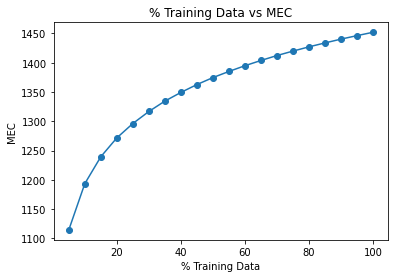

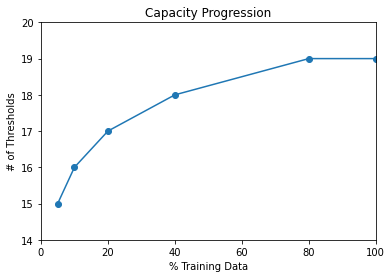

In [50]:
# Calculates the capacity progression for the Equilibrium Machine Learner
train_percent = np.arange(0.05, 1.05, 0.05)
MEC = [memorize(df.sample(frac=i, axis=0)) for i in train_percent]
x = [5, 10, 20, 40, 80, 100]
y = [15, 16, 17, 18, 19, 19]
plt.figure()
plt.title("% Training Data vs MEC")
plt.xlabel("% Training Data")
plt.ylabel("MEC")
plt.plot(train_percent*100,MEC)
plt.scatter(train_percent*100,MEC)
plt.show()
plt.figure()
plt.title("Capacity Progression")
plt.xlabel("% Training Data")
plt.ylabel("# of Thresholds")
plt.xlim(0,100)
plt.ylim(14,20,1)
plt.plot(x,y)
plt.scatter(x,y)
plt.show()

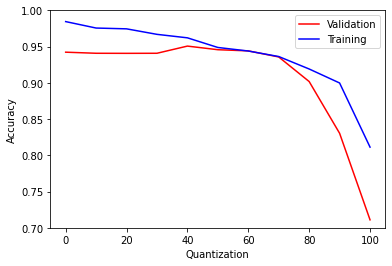

In [42]:
# Accuracy vs Quantization plot
arr = [0.7110,0.8304,0.9018,0.9357,0.9441,0.9457,0.9507,0.9408,0.9407,0.9408,0.9423]
arr1 = [0.8113,0.8998,0.9191,0.9363,0.9439,0.9488,0.9621,0.9669,0.9745,0.9756,0.9845]
quant = np.arange(100,-10,-10)
plt.figure()
plt.plot(quant[::-1],arr[::-1],'r-')
plt.plot(quant[::-1],arr1[::-1],'b-')
plt.ylim(0.7,1)
plt.xlabel("Quantization")
plt.ylabel("Accuracy")
plt.legend(["Validation", "Training"])
plt.show()